### How computer sees an image?

* RGB representation

<center><img src="img/image_rgb.png" width="600" /></center>

### Let's say we want to build image classifier using Fully-Connected Neural Network

<center><img src="img/feed-forward-image-classification.png" width="900" /></center>

#### Main issues with FC networks for image classification:
* **huge** number of parameters to learn (more than 17M in previous example)
* **not invariant** to small transformations or distortions of the input image
* **overfitting** possibility

### Convolutional Neural Network

* were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex.

<center><img src="img/human-visual-cortex.png" width="600" /></center>

* individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field
* the receptive fields of different neurons partially overlap such that they cover the entire visual field.

#### Quick historical facts

* Work by Hubel and Wiesel in the 1950s and 1960s showed that cat and monkey visual cortexes contain neurons that individually respond to small regions of the **visual field**.

* Kunihiko Fukushima in the 1980s proposed the **neocognitron** - a hierarchical, multilayered artificial neural network used for handwritten character recognition. The neocognitron was inspired by the model proposed by Hubel & Wiesel.

#### Quick historical facts

* LeCun et in 1989, used back-propagation to learn the **convolution kernel** coefficients directly from images of hand-written numbers. 

* In 1998 LeCun developed LeNet-5 - a pioneering 7-level convolutional network.

<center><img src="img/lecun.jpg" width="300" /></center>

* 2012 was the first year that Convolutional Neural Networks grew to prominence as **Alex Krizhevsky** used them to win that year's **ImageNet** competition.

### Convolutions

* **convolution operation**, is an element-wise product and sum between two matrices/vectors - **kernel** or **filter** and part of the **original input** or **image**.

#### 1D convolution
<center><img src="img/conv-1d.jpg" width="300" /></center>

#### 2D convolution
<center><img src="img/conv-before.png" width="400" /></center>

* The **convolution** of the **5x5 image** and the **3x3 kernel** can be computed as shown in the animation:

<center><img src="img/conv-after-dynamic.gif" width="400" /></center>

* We slide the **kernel** (orange matrix) over our **original image** (green) by 1 pixel (also called **stride**) and for every position and for every position, we compute element wise multiplication (between the two matrices) and add the multiplication outputs.
* The **3×3 kernel** observes only a part of the input image in each stride.
* **Kernel** acts as **feature detector** from the original input image.

### Convolution examples

<center><img src="img/conv-edge-detection.png" width="700" /></center>

### Convolution examples

<center><img src="img/conv-gaussian-blur.png" width="700" /></center>

### Convolution examples

<center><img src="img/conv-sharpen.png" width="700" /></center>

### Extracting two feature maps from the image

<center><img src="img/conv-animation.gif" width="600" /></center>

### Convolution: padding=0, stride=1

* Convolution operation over an **4x4 input image** using **3x3 kernel** results in **2x2 feature map**.

<center><img src="img/conv_no_padding_no_strides.gif" width="300" /></center>

### Convolution: padding=2, stride=1

* Convolution operation over an **5x5 input image** using **4x4 kernel** results in **6x6 feature map**.

<center><img src="img/conv_arbitrary_padding_no_strides.gif" width="300" /></center>

* Source: https://github.com/vdumoulin/conv_arithmetic

### Convolution characteristics

* **Depth**: Depth corresponds to the number of **kernels** we use for the convolution operation. It will determine how many **feature maps** will be produced by the convolution operation. You can think of these three feature maps as **stacked 2D matrices**.

* **Stride**: Stride is the number of pixels by which we slide our kernel over the input matrix. When the stride is 1 then we move the filters one pixel at a time. When the stride is 2, then the filters jump 2 pixels at a time as we slide them around. Having a **larger stride** will produce **smaller feature maps**.

* **Zero-padding**: Sometimes, it is convenient to **pad the input matrix with zeros around the border**, so that we can apply the filter to bordering elements of our input image matrix. A nice feature of zero padding is that it allows us to **control the size of the feature maps**.

### Adding Non-Linearity

* Just like in other Neural Networks we add an additional **non-linear transformations** after every **convolution** operation.

### ReLU

* The most commonly used **non-linear transformation** in convolutional neural networks is **ReLU** (Rectified Linear Unit).
* ReLU is an element wise operation (applied per pixel) and replaces all negative pixel values in the feature map by zero.

<center><img src="img/relu-chart.png" width="800" /></center>

### ReLU visualization

<center><img src="img/relu.png" width="800" /></center>

* Other non-linear functions **(tanh, sigmoid)** can also be used instead of **ReLU**, but **ReLU** has been found to perform better in most cases.

### Pooling

* **Spatial Pooling**, also reffered to as **subsampling** or **downsampling** reduces the dimensionality of each feature map but retains the most important information.
* There are different types of spatial pooling:
    * average
    * max
    * sum
    * etc.

### Max pooling

<center><img src="img/max-pooling.png" width="600" /></center>

#### LeNet-5 architecture (1998)

<center><img src="img/lenet.png" width="900" /></center>

#### AlexNet architecture (2012)

<center><img src="img/alexnet.png" width="900" /></center>

### Apply filter to the image using convolutions

In [1]:
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms
from torch.autograd import Variable

In [2]:
img = Image.open('./img/cat.png').convert('LA').resize((256, 256))

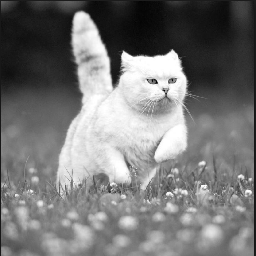

In [3]:
img

In [ ]:
to_tensor = transforms.Compose([transforms.ToTensor()])
to_pil = transforms.Compose([transforms.ToPILImage()])

In [ ]:
img_tensor = torch.unbind(to_tensor(img))
img_tensor = img_tensor[0].unsqueeze(0).unsqueeze(0)

In [ ]:
kernel = np.array([
    [-1,  -1,  -1],
    [-1,  +8,  -1],
    [-1,  -1, -1]
])

In [ ]:
conv1 = nn.Conv2d(1, 1, kernel_size=(3, 3), stride=1, padding=1, bias=False)
conv1.weight = nn.Parameter(torch.from_numpy(kernel).float().unsqueeze(0).unsqueeze(0))

In [ ]:
img_edges = conv1(Variable(img_tensor)).data.view(1, 256, 256)

In [ ]:
to_pil(img_edges)